In [14]:
#import libraries
import pandas_datareader as web
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [15]:
plt.style.use('fivethirtyeight')

In [16]:
#Get Stock quate
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-06-13')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-06-07,126.320000,124.830002,126.169998,125.900002,71057600.0,125.900002
2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.739998
2021-06-09,127.750000,126.519997,127.209999,127.129997,56877900.0,127.129997


In [17]:
df.tail(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-14,127.889999,125.849998,126.250000,127.449997,81806500.0,127.449997
2021-05-17,126.930000,125.169998,126.820000,126.269997,74244600.0,126.269997
2021-05-18,126.989998,124.779999,126.559998,124.849998,63342900.0,124.849998
2021-05-19,124.919998,122.860001,123.160004,124.690002,92612000.0,124.690002
2021-05-20,127.720001,125.099998,125.230003,127.309998,76857100.0,127.309998
2021-05-21,128.000000,125.209999,127.820000,125.430000,79295400.0,125.430000
2021-05-24,127.940002,125.940002,126.010002,127.099998,63092900.0,127.099998
2021-05-25,128.320007,126.320000,127.820000,126.900002,72009500.0,126.900002
2021-05-26,127.389999,126.419998,126.959999,126.849998,56575900.0,126.849998


In [18]:
#show the number of columns and rows i the dataset
df.shape

(2376, 6)

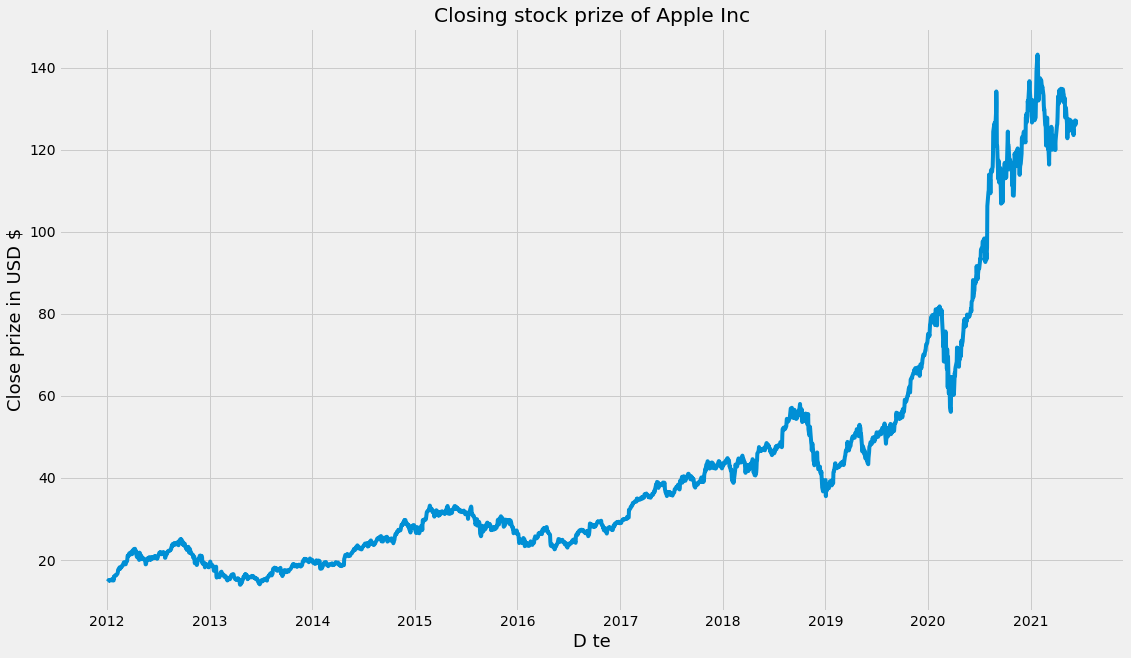

In [19]:
plt.figure(figsize=(17,10))
plt.title('Closing stock prize of Apple Inc')
plt.plot(df['Close'])
plt.xlabel('D te', fontsize=18)
plt.ylabel('Close prize in USD $',fontsize=18)
plt.show()

In [20]:
#create a new dataframe with only a close column
data = df.filter(['Close'])
#convert a dataframe to the numpy array
dataset = data.values
#tGet the number of rows to train the model on
train_data_len = math.ceil(len(dataset) * .8)
train_data_len

1901

In [21]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(dataset)
scaled

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.87594075],
       [0.8680468 ],
       [0.87764338]])

In [22]:
#Create a training dataset
#create a scaled training dataset
training_data = scaled[0:train_data_len, :]
#split the data set into X_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]



In [23]:
#Convert the x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1841, 60, 1)

In [25]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
#Train the model
model.fit(x_train, y_train , batch_size=1, epochs=1)


1841/1841 [==============================] - 49s 17ms/step - loss: 4.2299e-04 1s - lo - ETA: 0s - loss: 


In [27]:
#Create a testing datasets
#Create a new array containing the scaled values from 1762 to 2352
test_data = scaled[train_data_len - 60: , :]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[train_data_len: , :]

for  i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [28]:
#Convert the data as a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [29]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [30]:
#Get the root mean sqared error(RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

0.73897705078125

<ipython-input-31-4a22966e8995>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


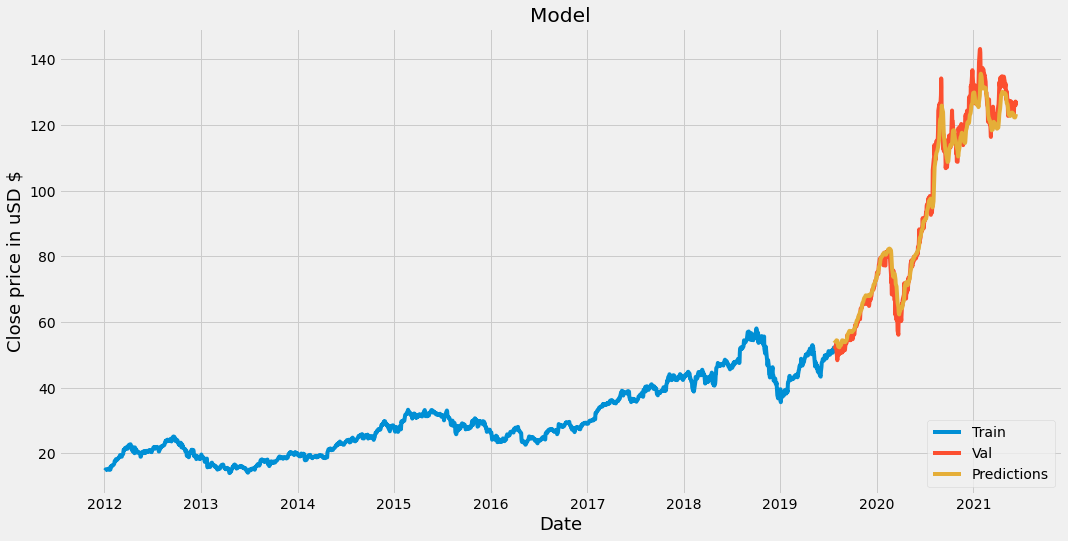

In [31]:
#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
#Vizualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in uSD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc='lower right')
plt.show()

## valid

In [37]:
valid

,Close,Predictions
Date,,
2019-07-25,51.755001,53.587700
2019-07-26,51.935001,53.733688
2019-07-29,52.419998,53.846256
2019-07-30,52.195000,53.987766
2019-07-31,53.259998,54.096767
...,...,...
2021-06-07,125.900002,122.288017
2021-06-08,126.739998,122.395210
2021-06-09,127.129997,122.694862


In [34]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end ='2021-06-03')
new_df = apple_quote.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[122.343765]]


In [38]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-06-04', end ='2021-06-04')
print(apple_quote2['Close'])

Date
2021-06-03    123.540001
2021-06-04    125.889999
Name: Close, dtype: float64
